In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape


(545, 13)

In [118]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [119]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [121]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [123]:
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [36]:
print(X_train.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


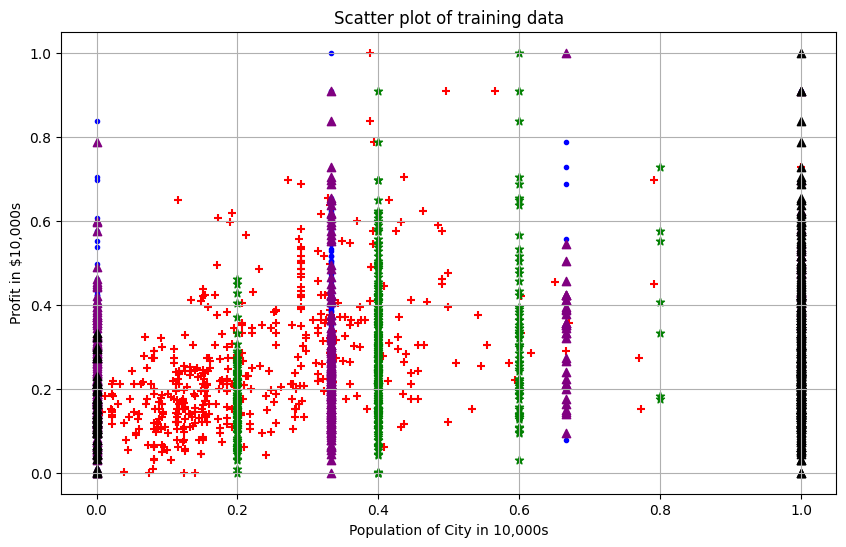

In [124]:
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Scatter plot
X_3 = X_train.values
plt.scatter(X_3[:,0], y, color='red',   marker='+')
plt.scatter(X_3[:,1], y, color='green', marker='*')
plt.scatter(X_3[:,2], y, color='blue',  marker= '.')
plt.scatter(X_3[:,3], y, color='purple',marker= '^')
plt.scatter(X_3[:,4], y, color='black', marker= '^')
# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [106]:
m = len(y_train.values)
#X_train.pop('furnishingstatus')
X_3 = X_train[input]
X_0 = np.ones((m , 1))
X = np.hstack((X_0, X_3))
y = y_train.values
#print(y)
theta = np.zeros(12)
iterations = 1000;
alpha = .01;

In [87]:
def compute_cost(X, y, theta, lam):

 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 sqrtheta = np.square(theta)
 J = 1 / (2 * m) * (np.sum(sqrErrors) + lam*np.sum(sqrtheta))
 return J

def gradient_descent(X, y, theta, alpha, iterations, lam):

    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, lam)
    return theta, cost_history

In [107]:
X_0 = np.ones((m, 1))
X = np.hstack((X_0, X_3))
theta = np.zeros(6)
iterations = 1000;
alpha = .01;

In [125]:
# Lets compute the cost for theta values
lam = 10
cost = compute_cost(X, y, theta, lam)
print('The cost for given values of theta_0, theta_1, theta_2 and theta_3 =', cost)

The cost for given values of theta_0, theta_1, theta_2 and theta_3 = 0.008061146133230316


In [126]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations, lam)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [0.08630492 0.22305308 0.09039809 0.20623282 0.15123714 0.12653827]


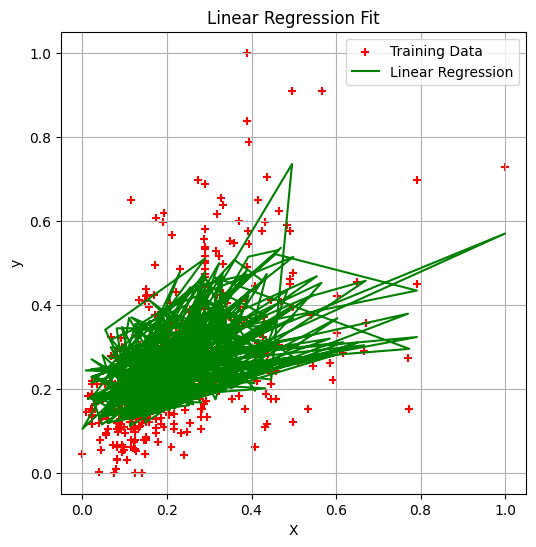

In [127]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

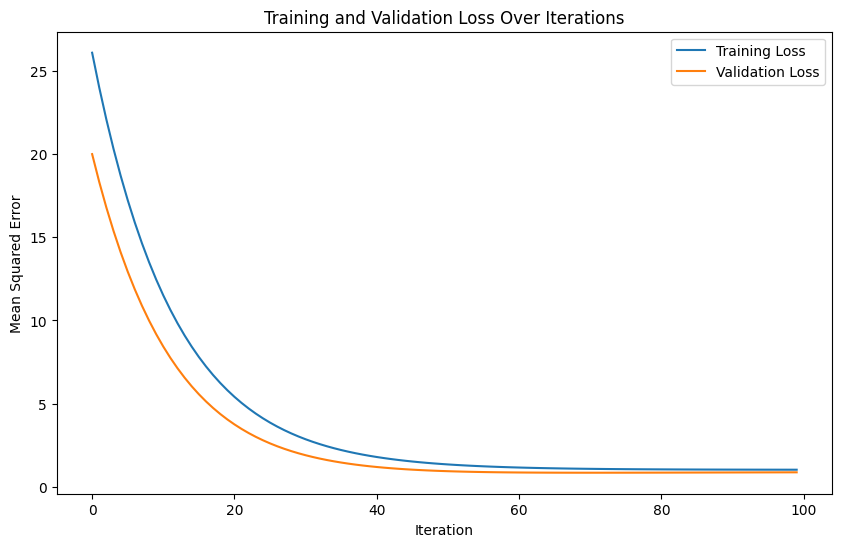

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create dummy data for linear regression
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 100
m = len(X_train)

# initial values
theta = np.random.randn(2,1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

3b

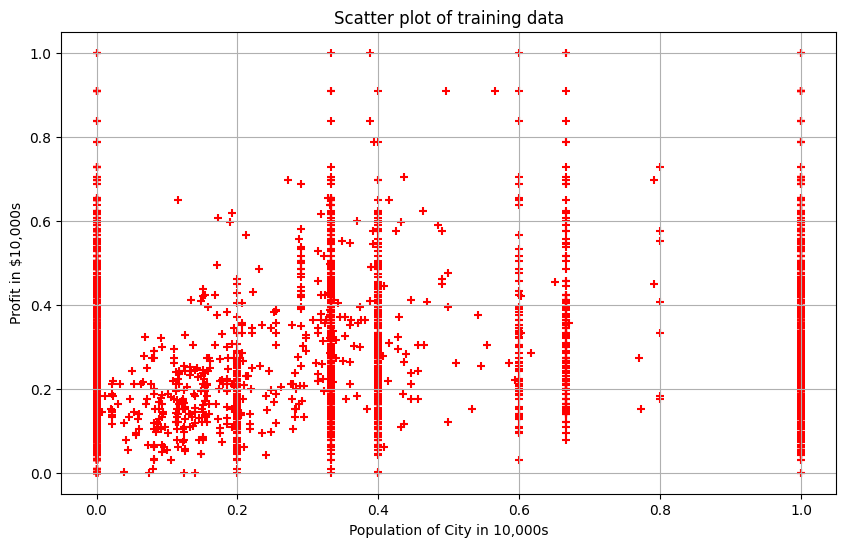

In [110]:
#y_train = df_train.pop('price')
X_train = df_train
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
# Scatter plot
for i in input:
  plt.scatter(X_train[i], y_train.values, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [68]:
m = len(y_train.values)
#X_train.pop('furnishingstatus')
X_3 = X_train
X_0 = np.ones((m , 1))
X = np.hstack((X_0, X_3))
y = y_train.values
#print(y)
theta = np.zeros(12)
iterations = 1000;
alpha = .01;

In [95]:
X_0 = np.ones((m, 1))
X = np.hstack((X_0, X_3))
theta = np.zeros(12)
iterations = 1000;
alpha = .01;

In [99]:
# Lets compute the cost for theta values
lam = 10
cost = compute_cost(X, y, theta, lam)
print('The cost for given values of theta_0, theta_1, theta_2 and theta_3 =', cost)

The cost for given values of theta_0, theta_1, theta_2 and theta_3 = 0.006254773663265181


In [100]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations, lam)
print('Final value of theta =', theta)
# print('cost_history =', cost_history)

Final value of theta = [0.03061102 0.12008945 0.06510973 0.14452059 0.11297287 0.06068337
 0.04940964 0.02475432 0.06014191 0.09220605 0.09135681 0.06029319]


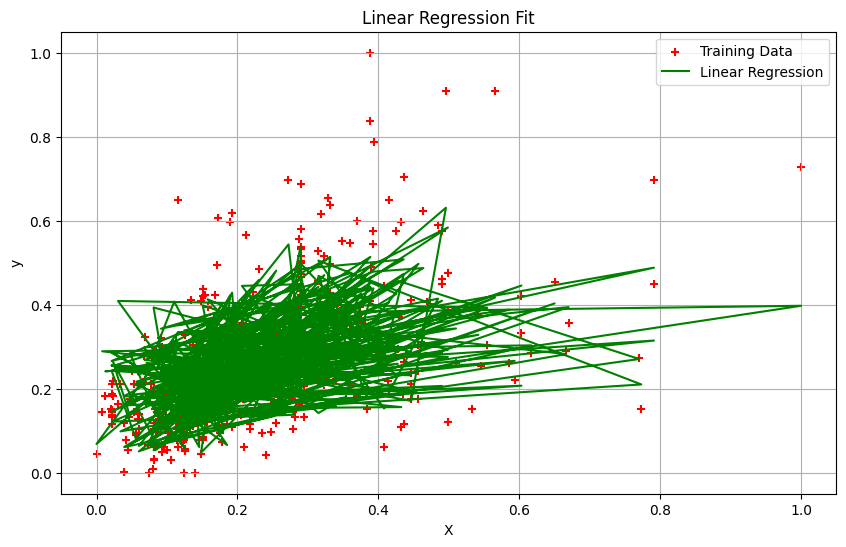

In [101]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

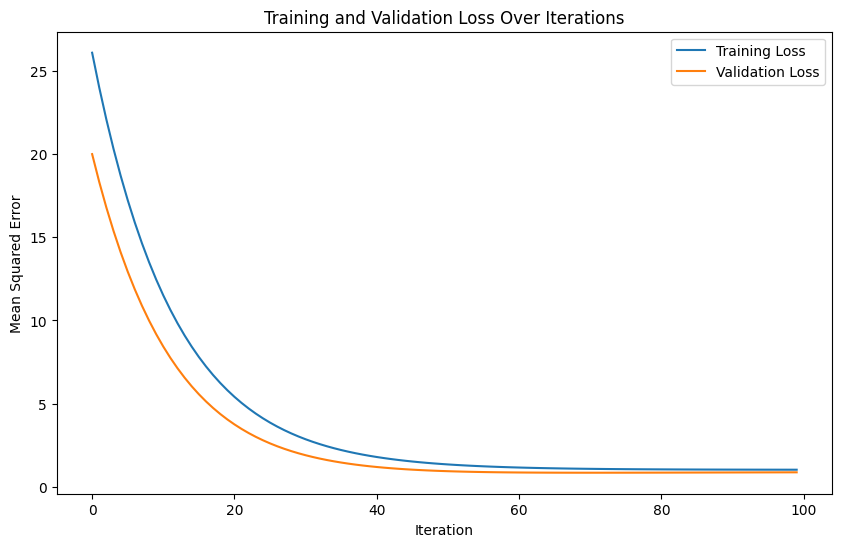

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create dummy data for linear regression
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Split the data into training and validation sets
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 100
m = len(X_train)

# initial values
theta = np.random.randn(2,1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()